In [1]:
class Obj():
  def _repr_html_(self):
    return "<b id='asdf'>bold</b><script>console.log('hi'); console.log(document.body.innerText); document.querySelector('#asdf').innerHTML = 'new';</script>"
    # return { "text/html": "<b><script>alert('hi');</script>bold</b>" }

Obj()

In [2]:
import IPython
# IPython.get_ipython().find_user_code("Test.ipynb")

In [3]:
import inspect
inspect.getfile(inspect.currentframe())

'/var/folders/sw/ssd2bhc911x2p56s_28rk0jc0000gn/T/ipykernel_32070/3653608800.py'

In [4]:
ipy = IPython.get_ipython()
ipy.filename

'<ipython console>'

{'text/plain': "Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …", 'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/NK7nSAAAACXBIWXMAAA9hAAAPYQGoP6dpAABdQ0lEQVR4nO3dd3hUVeI+8HdKMumNdNIJEEInQAjFRiQgFlx1gQUpIigCrmIjuwquDdv6c1UE6aAIiIoFNYBBihAIJEZCCCWQXglJZlLIJJmZ3x8D890sEAIpZ2bu+3me+7BM7ty8E2a9b87ce47MYDAYQERERESSIRcdgIiIiIg6FwsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIRERFJDAsgERERkcSwABIR
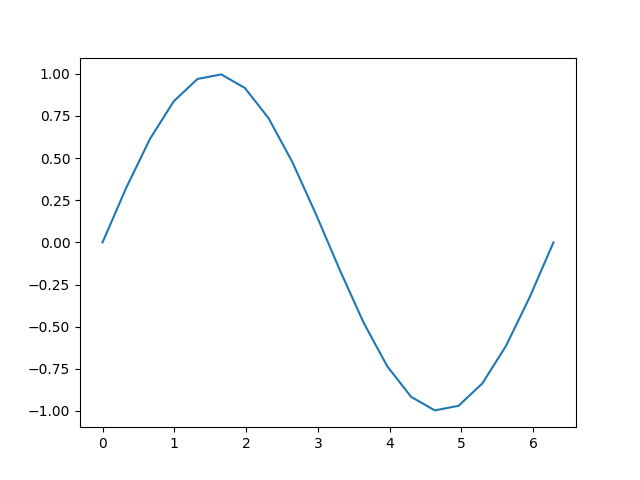

In [19]:
# %matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipympl
import ipympl.backend_nbagg
import matplotlib.backend_bases
import random

count = []

# class Canvas(ipympl.backend_nbagg.Canvas):
#     def draw(self):
#         # self.figure.axes[0].text(random.random(), random.random(), self._message)
#         # print(self._message)
#         # START HERE: draw some sane annotation, e.g. a selection of the line.
#         super().draw()
    

# @matplotlib.backend_bases._Backend.export
# class _Backend_snp(ipympl.backend_nbagg._Backend):
#     FigureCanvas = Canvas
#     FigureManager = ipympl.backend_nbagg.FigureManager


mpl.use("nbAgg") # Have to first change to a different backend in order to get the classes to reload on the next line.
mpl.use("module://ipympl.backend_nbagg")
# mpl.use("module://" + __name__)

x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
fig, ax = plt.subplots()
# lines = ax.plot(x, y, picker=True, pickradius=5)
lines = ax.plot(x, y)
# ax.xaxis.mouseover = "hi"
# def onclick(event):
#     tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
#     ax.set_title(tx)

# def onpick(event):
#     thisline = event.artist
#     xdata = thisline.get_xdata()
#     ydata = thisline.get_ydata()
#     ind = event.ind
#     points = tuple(zip(xdata[ind], ydata[ind])) 
#     ax.set_title(points)
# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# cid = fig.canvas.mpl_connect('pick_event', onpick)

import matplotlib.patheffects as path_effects
# hover_effect = path_effects.withSimplePatchShadow()
hover_effect = path_effects.Stroke(linewidth=3, foreground='black')

def add_hover_effect(artist):
    artist.set_path_effects(artist.get_path_effects() + [hover_effect])

def remove_hover_effect(artist):
    artist.set_path_effects([effect for effect in artist.get_path_effects() if effect is not hover_effect])

def selectable(artist):
    return not isinstance(artist, matplotlib.patches.Rectangle)

def children(artist):
    if "get_children" in dir(artist):
        if isinstance(artist, matplotlib.figure.Figure):
            return artist.get_children()[::-1] # reverse the children so we pick the deep stuff on mouseover
        else:
            return artist.get_children()
    else:
        return []

def snp_is_hovered(artist, mouseevent):
    if not selectable(artist):
        return False
    if isinstance(artist, matplotlib.axis.Tick):
        for child in children(artist):
            if snp_is_hovered(child, mouseevent):
                return True
        return False
    else:
        return artist.contains(mouseevent)[0]

def snp_hovered_artist(artist, mouseevent):
    for child in children(artist):
        hovered_descendent = snp_hovered_artist(child, mouseevent)
        if hovered_descendent is not None:
            return hovered_descendent
    if artist.contains(mouseevent)[0]:
        return artist
    else:
        return None


def onmousemove(event):
    # if event.inaxes is None:
    #     return
    fig_artists = all_artists(event.canvas.figure)
    hovered_artist = snp_hovered_artist(event.canvas.figure, event)
    # hovered_artists = [artist for artist in fig_artists if snp_is_hovered(artist, event)]
    # hovered_artists = [artist for artist in fig_artists if artist.contains(event)[0]]
    for artist in fig_artists:
        remove_hover_effect(artist)
    # for artist in hovered_artists:
        # add_hover_effect(artist)
    if hovered_artist is not None:
        add_hover_effect(hovered_artist)
    # event.canvas.manager.toolmanager.send_message("asdf")
    event.canvas.manager.set_window_title(str(hovered_artist))
    # event.canvas.manager.set_window_title(str((event.x,event.y)))
    event.canvas.draw_idle()
    # print(len(artists))
    # print(artists)    
        
        # print((event.xdata, event.ydata))
        # event.inaxes.add_artist(mpl.patches.Circle((event.xdata, event.ydata), 0.01))

fig.canvas.mpl_connect('motion_notify_event', onmousemove)
# fig.canvas.mpl_connect('figure_enter_event', lambda event: event.canvas.manager.set_window_title("enter"))
# fig.canvas.mpl_connect('figure_leave_event', lambda event: event.canvas.manager.set_window_title("leave"))


def flatten(lists):
    return sum(lists, []) # https://stackoverflow.com/a/952946

def all_artists(artist):
    if "get_children" in dir(artist):
        return [artist] + flatten([all_artists(artist) for artist in artist.get_children()])
    else:
        return [artist]


def print_artists(artist, prefix=""):
    print(prefix + str(artist))
    if "get_children" in dir(artist):
        for child in artist.get_children():
            print_artists(child, prefix + "    ")

# setattr(mpl.figure.Figure, "asdf", lambda self: print("asdf"))

# fig.get_children()[0].get_children()
# all_artists(fig)
# for artist in all_artists(fig):
#     if "get_bbox" in dir(artist):
#         bbox = artist.get_bbox()
#     elif "get_bbox_patch" in dir(artist):
#         bbox = artist.get_bbox_patch()
#     else:
#         bbox = None
#     print(artist, bbox)
# ax.set_ylabel("asdf")
print(fig.canvas._repr_mimebundle_())
# print_artists(fig)
# ax.yaxis.label.get_window_extent()
# old_meth = fig.canvas.handle_event
# def handle_event(self, event):
#     print(event['type'])
#     return mpl.backends.backend_webagg_core.FigureCanvasWebAggCore.handle_event(self, event)
# setattr(ipympl.backend_nbagg.Canvas, "handle_event", handle_event)

# print_artists(fig) # need this after, so ticks are positions
# for artist in all_artists(fig):
#     if "get_bbox" in dir(artist):
#         bbox = artist.get_bbox()
#     elif "get_bbox_patch" in dir(artist):
#         bbox = artist.get_bbox_patch()
#     else:
#         bbox = None
#     print(artist, bbox)


In [7]:
mpl._version.version

'3.5.3'

In [8]:
mpl.get_backend()

'module://ipympl.backend_nbagg'

In [9]:
class Object():
  pass

obj = Object()
obj.stuff = "asdf"
obj.stuff

'asdf'